In [32]:
import numpy as np
from sklearn import datasets
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data')
# df_wine.columns = ['Class label', 
#                    'Alcohol', 
#                    'Malic acid', 
#                    'Ash',
#                    'Alcanlinity of Ash', 
#                    'Magnesium',
#                    'Total phenols',
#                    'Flavanoids',
#                    'Nonflavanoid phenols',
#                    'Proanthocyanins',
#                    'Color intensity', 
#                    'Hue',
#                    '0D280/0D315 of diluted wines',
#                    'proline']
df_wine


,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [33]:
from sklearn.model_selection import train_test_split

# X는 두번째부터 마지막 모든 열(13개)
# y는 데이터프레임에서 가장 첫번째 열(1개)
X, y = df_wine.iloc[:, 1:].values , df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size= 0.3, # test는 전체의 30%
                                                    random_state=0, 
                                                    stratify=y)

In [34]:
from sklearn.preprocessing import StandardScaler
# 표준화
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

반달 모양 데이터 가져오기

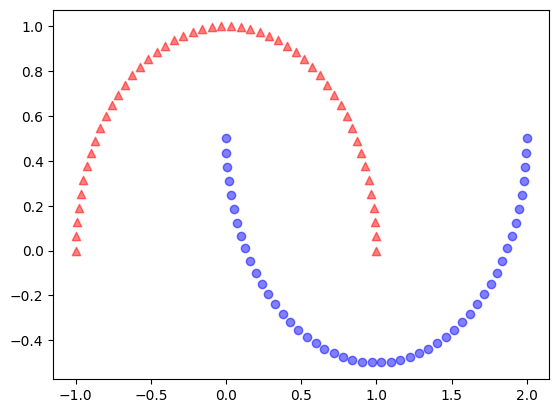

In [35]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X_moon, y_moon = make_moons(n_samples=100, random_state= 123)
plt.scatter(X_moon[y_moon==0, 0], X_moon[y_moon==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X_moon[y_moon==1, 0], X_moon[y_moon==1, 1], color='blue', marker='o', alpha=0.5)
plt.show()

사이킷런의 커널 PCA를 이용해서 반달모양 데이터 분류하기

gamma값은 자동으로 최적화 되지 않는다. 시행착오를 거치면서 조정하거나, 뒤에 이를 튜닝하는법을 배울것이다.

1. 커널 PCA (Kernel PCA)
특징

커널 PCA는 선형 PCA를 확장하여 비선형 관계를 포착합니다.
고차원 특징 공간으로 데이터를 매핑한 뒤, 이 공간에서 선형 PCA를 수행합니다.
공간의 차원을 감소시키면서도 데이터의 주요 구조를 유지할 수 있습니다.
적합한 데이터셋

복잡한 비선형 구조를 가진 데이터셋에서 효과적입니다.
많은 경우에서 분류 문제에 유용하게 적용될 수 있습니다.
예를 들어, 이미지나 텍스트 데이터에서 패턴을 인식하는 데 사용될 수 있습니다.


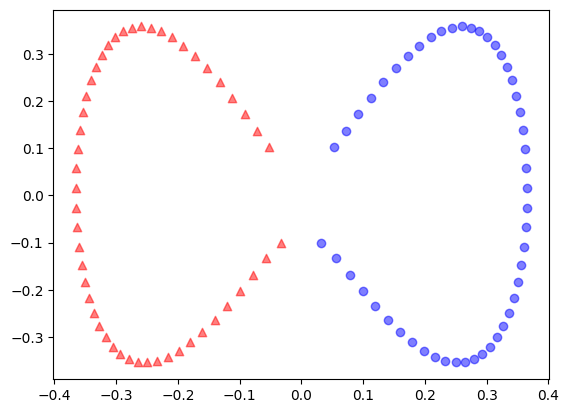

In [36]:
from sklearn.decomposition import KernelPCA

scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15) 
X_kernpca = scikit_kpca.fit_transform(X_moon) # 비지도학습임으로 y안넣어줘도 된다.

plt.scatter(X_kernpca[y_moon==0, 0], X_kernpca[y_moon==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X_kernpca[y_moon==1, 0], X_kernpca[y_moon==1, 1], color='blue', marker='o', alpha=0.5)
plt.show()

동심원 데이터 가져오기

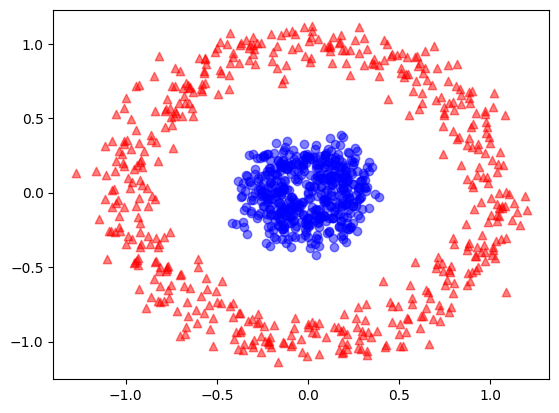

In [37]:
from sklearn.datasets import make_circles
X_circle, y_circle = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
plt.scatter(X_circle[y_circle==0, 0], X_circle[y_circle==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X_circle[y_circle==1, 0], X_circle[y_circle==1, 1], color='blue', marker='o', alpha=0.5)
plt.show()

매니폴드 학습(manfold learning)
비선형 차원 축소를 위한 고급기법이다. 이는 사이킷런에 구현돼있다.
그 개념은 다루지 않지만, 사이킷런 모듈을 이용한 코드 활용법은 소개돼있다.

In [38]:
# 2차원 데이터셋을 그래프로 기려주는 간단한 함수 정의
def plot_manifold(X, y):
    plt.scatter(X[y==0, 0], X[y==0, 1],
                color='red', marker='^', alpha=0.5)
    plt.scatter(X[y==1, 0], X[y==1, 1],
                color='blue', marker='o', alpha=0.5)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.tight_layout()
    plt.show()
    

지역 선형 임베딩(Locally Linear Embedding, LLE)은 이웃한 샘플간의 거리를 유지하는 저차원 투영을 찾는다.


2. 지역 선형 임베딩 (Locally Linear Embedding, LLE)
특징

LLE는 각 데이터 포인트와 그 이웃 간의 선형 관계를 보존하려고 시도합니다.
고차원 데이터를 저차원으로 투영할 때, 각 포인트의 지역적인 이웃 구조를 유지합니다.
이 방법은 전역 구조보다는 지역적인 선형성에 초점을 맞춥니다.
적합한 데이터셋

데이터가 작은 패치나 그룹에서 강한 지역적 선형성을 보이는 경우 유리합니다.
예를 들어, 얼굴 인식, 음성 인식에서 사용되며 복잡한 센서 데이터의 패턴 인식에도 적용될 수 있습니다.

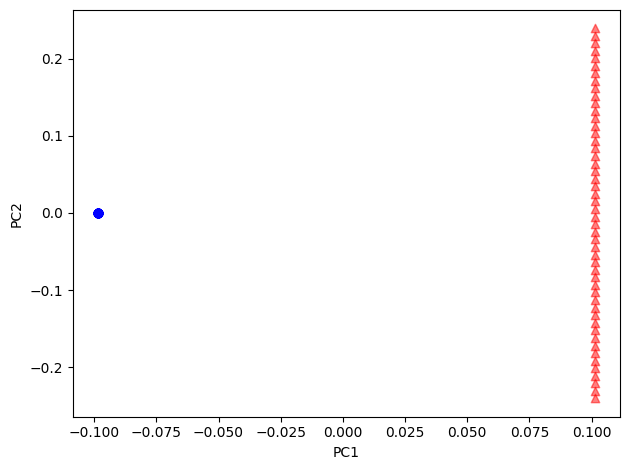

In [39]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, random_state=1)
X_lle = lle.fit_transform(X_moon)
plot_manifold(X_lle, y_moon)

t-SNE(t - distributed Stochasitc Neighbor Embedding)는 데이터 포인트 간의 유사도를 결합 확률로 변환한다.
특히 고차원 데이터셋을 시각화 하는 성능이 뛰어나다.


3. t-SNE (t-distributed Stochastic Neighbor Embedding)
특징

t-SNE는 고차원 데이터의 점들을 저차원(주로 2D 또는 3D)으로 효과적으로 시각화하기 위해 설계되었습니다.
고차원에서의 유사한 데이터 포인트는 저차원에서도 가깝게 위치하게 되어 있으며, 불유사한 포인트는 멀리 떨어지도록 매핑됩니다.
t-SNE는 복잡한 데이터의 클러스터 구조를 시각화하는 데 특히 유용합니다.
적합한 데이터셋

클러스터링이나 데이터의 시각적 탐색에 강점을 보입니다.
생물정보학, 컴퓨터 비전에서 데이터의 패턴을 이해하거나 클러스터를 식별하는 데 유리합니다.

/home/viplab/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/viplab/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


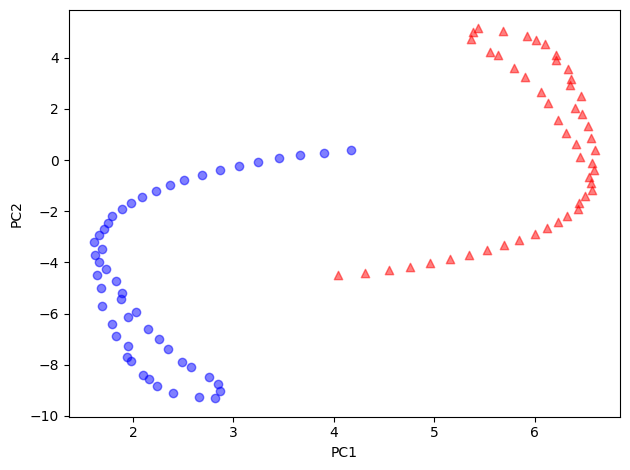

In [41]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=1)
X_tsne = tsne.fit_transform(X_moon)
plot_manifold(X_tsne, y_moon)